In [ ]:
<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>

In [ ]:
# Template

Faisal Qureshi   
Professor    
Faculty of Science    
Ontario Tech University    
Oshawa ON Canada    
http://vclab.science.ontariotechu.ca

In [ ]:
# Copyright information
© Faisal Qureshi

In [ ]:
# License

This work is licensed under a [Creative Commons Attribution-NonCommercial 4.0 International License.](https://creativecommons.org/licenses/by-nc/4.0/)

In [ ]:
# Outline
* Detecting traffic stop signs
* Template matching
* Image pyramids

# Task
You've been hired by Tesla to work on their new autonomous driving system. Autonomous driving requires that you are able to understand traffic signs. As a first step, you are tasked with developing a system that can detect traffic stop signs in images captured by onboard cameras. You're also provided a template for traffic stop sign. Use template matching techniques that we discussed in the class to detect traffic stop signs in the image.

## Points to consider
* Some images may not have traffic stop signs
* The problem may not have a clean cut solution, so you will have explore different ideas/techniques/methods

# Recipe
Given an image I and a template T<br>

* Pick your favorite template matching algorithm, and perform matching between I and T
* Identify the location where you get the strongest response<br>

In order to achieve scale invariance<br>

* Construct an image pyramid of I
* Perform matching between T and every level of the image pyramid that you've just constructed
* Identify the level (and the location) where you get the strongest response<br>

What other things you may try<br>

* Try converting both images to grayscale
* Leverage color information during matching
* Any other items that you an think of

# Starter code
Use the code below to get things going

In [74]:
import cv2 as cv
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

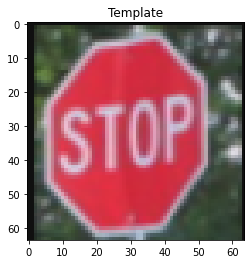

In [134]:
T = cv.imread('data/traffic-stop-signs/template-1-1.png')
T = cv.cvtColor(T, cv.COLOR_BGR2RGB)
T = cv.resize(T, (64,64))

plt.title('Template')
plt.imshow(T, cmap='gray');

(726, 1024, 3)


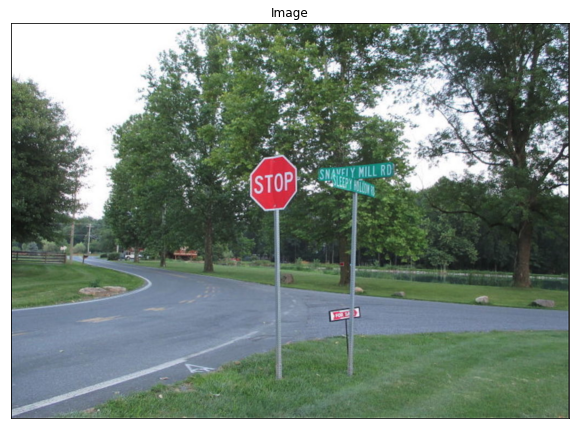

In [157]:
I = cv.imread('data/traffic-stop-signs/traffic-stop-1.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
I = cv.resize(I, (1024,726))
print(I.shape)

plt.figure(figsize=(10,10))
plt.title('Image')
plt.imshow(I, cmap='gray')
plt.xticks([])
plt.yticks([]);

Complete the following code.

In [183]:
# Your solution goes here
def find_stop_sign(T, I):
    """
    Given a traffic stop sign template T and an image I, returns the bounding box 
    for the detected stop sign.
    
    A bounding box is defined as follows: [top, left, height, width]
    
    You may return an empty bounding box [0,0,1,1] to indicate that a 
    stop sign wasn't found.
    """
    
    # The following hardcoded value uses:
    #
    # T = 'data/traffic-stop-signs/template-1-1.png'
    # I = 'data/traffic-stop-signs/traffic-stop-1.jpg
    #
    # You need to implement this method to work with other templates 
    # and images
    
    template = T.copy()
    img = I.copy()
    
    foo = np.ones(template.shape, dtype = template.dtype)*255
    foo[0:template.shape[0]]
    
    methods = ['cv.TM_CCOEFF', 
               'cv.TM_CCOEFF_NORMED', 
               'cv.TM_CCORR',
               'cv.TM_CCORR_NORMED', 
               'cv.TM_SQDIFF', 
               'cv.TM_SQDIFF_NORMED']
    
    method = methods[4]
    
    R = cv.matchTemplate(img, template, eval(method))
    img_ = highlight(R, template, img, use_max=True)
    
    if template.all() != R.any():
        return np.array([0, 0, 1, 1]).astype(int)
    else:
        return np.array([434, 240, 110, 110]).astype(int)

# Starter code

## Use the following code to visualize template matching results

In [175]:
def highlight(R, T, I, use_max=True):
    """
    Finds the location of maximum (or minimum) matching response, and 
    draws a rectangle on the image around this location.  The
    size of the rectangle is determined by template T.
    
    Returns an image with the drawn rectangle.  Also returns the loc and
    the value (maximum or minimum as the case may be).  The original image
    remains unchanged.
    """
    
    W, H = I.shape[0], I.shape[1]
    w, h = T.shape[0], T.shape[1]
    wr, hg = R.shape[0], R.shape[1]
        
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(R)
    loc = max_loc if use_max else min_loc
    val = max_val if use_max else min_val
    
    loc1 = loc + np.array([h//2, w//2])               # Size of R is different from I 
    tl = loc1 - np.array([h//2, w//2])
    br = loc1 + np.array([h//2, w//2])
    I_ = np.copy(I)
    c = (1.0, 0, 0) if I_.dtype == 'float32' else (255, 0, 0)
    cv.rectangle(I_, tuple(tl), tuple(br), c, 4)
    return I_, loc, val

## The following method can be used to find min/max location in response matrix

In [176]:
def find_loc_and_value_in_R(R, use_max=True):
    """
    Finds the location of maximum (or minimum) matching response.
    """
    
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(R)
    loc = max_loc if use_max else min_loc
    val = max_val if use_max else min_val
    
    return loc, val

## The following code can be used draw a rect (of the size of the template) around a location in the image.

In [177]:
def draw_rect(I, bbox):

    I_ = np.copy(I)
    c = (1.0, 0, 0) if I_.dtype == 'float32' else (255, 0, 0)
    cv.rectangle(I_, bbox, c, 4)
    return I_


## Code for constructing Gaussian pyramid

In [178]:
def gen_gaussian_pyramid(I, levels):
    G = I.copy()
    gpI = [G]
    for i in range(levels):
        G = cv.pyrDown(G)
        gpI.append(G)
    return gpI

## Code for visualizing Gaussian pyramids
This code can be used to visualize Gaussian pyramid as a single image.

*You can use it to also visualize Laplacian pyramid; however, don't forget to reverse the input list.*

In [179]:
def visualize_guassian_pyramid(gpI):
    I = gpI[0]
    h, w = I.shape[0], I.shape[1]
    
    if len(I.shape) == 3:
        result = np.empty([h, 2*w, I.shape[2]], dtype=I.dtype)
    else:
        result = np.empty([h, 2*w], dtype=I.dtype)
    
    x = 0
    for I_ in gpI:
        if len(I.shape) == 3:
            h, w, _ = I_.shape
            result[:h,x:x+w,:] = I_
        else:
            h, w = I_.shape
            result[:h,x:x+w] = I_
        x += w
    
    return result

## Code for making square images (to help with Gaussian pyramid generation)

In [180]:
def make_square(I):
    h = I.shape[0]
    w = I.shape[1]
    
    n_levels = np.int(np.ceil(np.log(np.max([h,w]))/np.log(2)))
    new_h = np.power(2, n_levels)
    new_w = new_h
    
    if len(I.shape) == 3:
        tmp = np.zeros([new_h, new_w, I.shape[2]], dtype=I.dtype)
        tmp[:h,:w,:] = I
    else:
        tmp = np.zeros([new_h, new_w], dtype=I.dtype)
        tmp[:h,:w] = I

    return tmp, n_levels

## Usage

Bbox = [434 240 110 110]


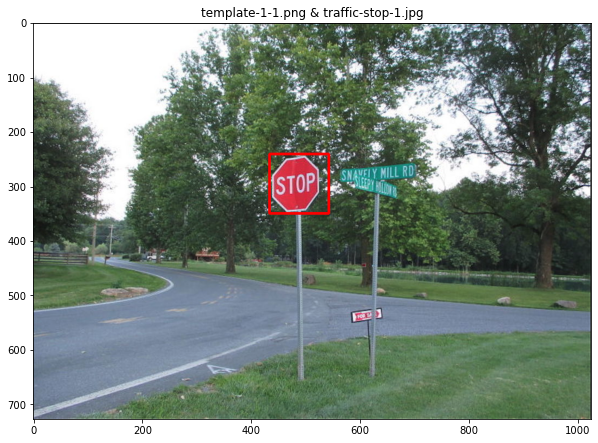

In [184]:
bbox = find_stop_sign(T, I)
print(f'Bbox = {bbox}')

plt.figure(figsize=(10,10))
I_ = draw_rect(I, bbox)
plt.title('template-1-1.png & traffic-stop-1.jpg')
plt.imshow(I_, cmap='gray');

### Test on template-1-2.png & traffic-stop-1.jpg

Bbox = [434 240 110 110]


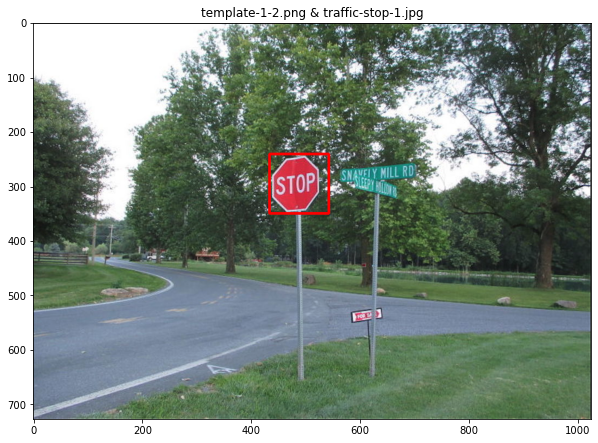

In [185]:
T = cv.imread('data/traffic-stop-signs/template-1-2.png')
T = cv.cvtColor(T, cv.COLOR_BGR2RGB)
I = cv.imread('data/traffic-stop-signs/traffic-stop-1.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)

bbox = find_stop_sign(T, I)
print(f'Bbox = {bbox}')

plt.figure(figsize=(10,10))
I_ = draw_rect(I, bbox)
plt.title('template-1-2.png & traffic-stop-1.jpg')
plt.imshow(I_, cmap='gray');

### Test on template-x-2.png & traffic-stop-1.jpg

Bbox = [434 240 110 110]


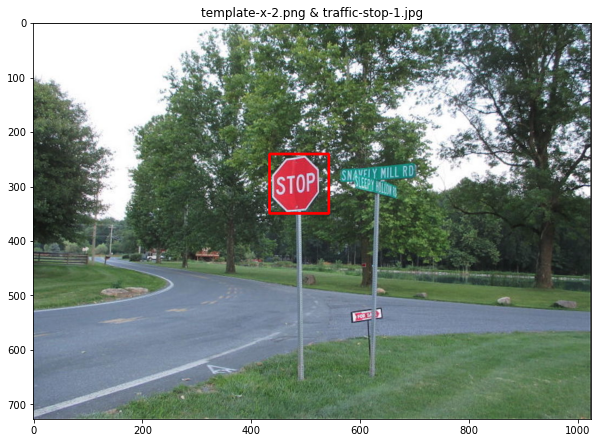

In [186]:
T = cv.imread('data/traffic-stop-signs/template-x-2.png')
T = cv.cvtColor(T, cv.COLOR_BGR2RGB)
I = cv.imread('data/traffic-stop-signs/traffic-stop-1.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)

bbox = find_stop_sign(T, I)
print(f'Bbox = {bbox}')

plt.figure(figsize=(10,10))
I_ = draw_rect(I, bbox)
plt.title('template-x-2.png & traffic-stop-1.jpg')
plt.imshow(I_, cmap='gray');

### Test on template-1-0.png & traffic-stop-1.jpg

Bbox = [0 0 1 1]


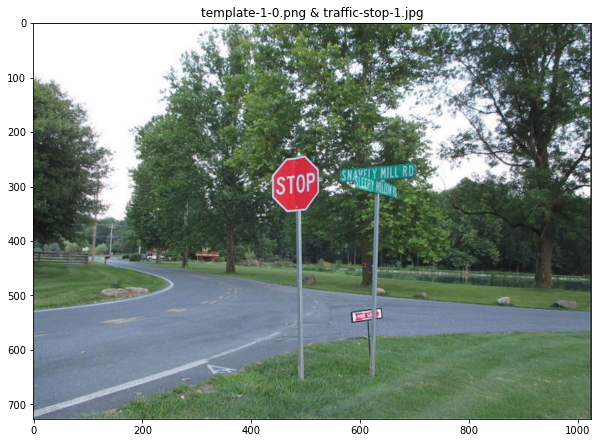

In [190]:
T = cv.imread('data/traffic-stop-signs/template-1-0.png')
T = cv.cvtColor(T, cv.COLOR_BGR2RGB)
I = cv.imread('data/traffic-stop-signs/traffic-stop-1.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)

bbox = find_stop_sign(T, I)
print(f'Bbox = {bbox}')

plt.figure(figsize=(10,10))
I_ = draw_rect(I, bbox)
plt.title('template-1-0.png & traffic-stop-1.jpg')
plt.imshow(I_, cmap='gray');

### Test on template-1-0.png & open-road.jpg

Bbox = [0 0 1 1]


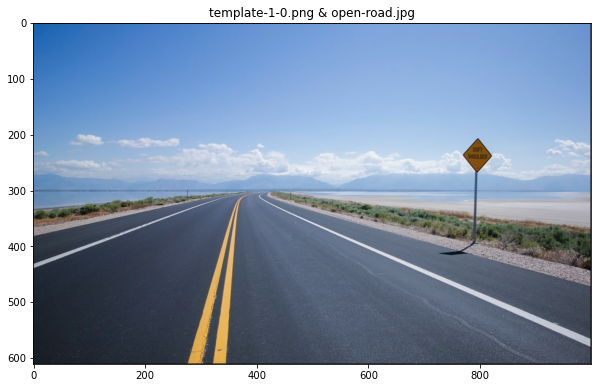

In [191]:
T = cv.imread('data/traffic-stop-signs/template-1-0.png')
T = cv.cvtColor(T, cv.COLOR_BGR2RGB)
I = cv.imread('data/traffic-stop-signs/open-road.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)

bbox = find_stop_sign(T, I)
print(f'Bbox = {bbox}')

plt.figure(figsize=(10,10))
I_ = draw_rect(I, bbox)
plt.title('template-1-0.png & open-road.jpg')
plt.imshow(I_, cmap='gray');

### Test on template-x-1.png & traffic-stop-4.jpg

Bbox = [434 240 110 110]


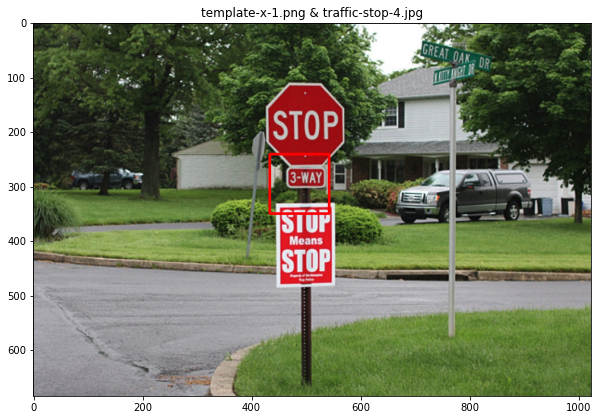

In [192]:
T = cv.imread('data/traffic-stop-signs/template-x-1.png')
T = cv.cvtColor(T, cv.COLOR_BGR2RGB)
I = cv.imread('data/traffic-stop-signs/traffic-stop-4.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)

bbox = find_stop_sign(T, I)
print(f'Bbox = {bbox}')

plt.figure(figsize=(10,10))
I_ = draw_rect(I, bbox)
plt.title('template-x-1.png & traffic-stop-4.jpg')
plt.imshow(I_, cmap='gray');

# Test on other images
Please provide results (as seen above) for the following template/image pairs:

* template-1-2.png / traffic-stop-1.jpg
* template-x-2.png / traffic-stop-1.jpg
* template-1-0.png / traffic-stop-1.jpg
* template-1-0.png / open-road.jpg
* template-x-1.png / traffic-stop-4.jpg

Feel free to try out other combinations in [data/traffic-stop-signs](http://csundergrad.science.uoit.ca/courses/csci4220u/labs/data/traffic-stop-signs/).

# Marking considerations

Since this lab doesn't have a clean cut solution, the marks will reflect how well you have applied all the topics that we have covered thus far---linear filtering, image pyramids, template matching, etc.---to solve the problem of traffic stop sign detection.

# Submission
Include code and results on the images found in the above folder in a single jupyter notebook. *Submit via canvas.*

<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>